In [1]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [9]:
boston = load_boston()

In [10]:
print(boston.DESR)

AttributeError: DESR

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston.data.shape

(506, 13)

In [13]:
columnNames = boston.feature_names
columnNames

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
Data = pd.DataFrame(boston.data, columns = columnNames)

In [15]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
Data_Labels = boston.target
Data_Labels.shape

(506,)

In [17]:
Data["PRICE"] = Data_Labels

In [18]:
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(Data, Data["PRICE"], test_size = 0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [20]:
m = X_train.shape[0]

In [27]:
#weight = np.random.rand(13, 1)

In [28]:
#weight

array([[0.45891597],
       [0.17080249],
       [0.93436315],
       [0.88425494],
       [0.53880066],
       [0.86743887],
       [0.15871447],
       [0.41310052],
       [0.60200145],
       [0.3134126 ],
       [0.08514988],
       [0.18113954],
       [0.51482268]])

In [29]:
#b = np.random.random()   # generating initial random y-intercept
#b

0.3142450782369762

In [36]:
#Performing Stochastic Gradient Descent by taking 10 random samples

weight = np.random.randn(13)*np.sqrt(2/m)   # defining initial random weight from normal distribution
b = np.random.randn(1)*np.sqrt(2/m)   # generating initial random y-intercept from normal distribution

learningRate = 0.2

for i in range(2500):    # running 2500 iterations
    Data_batch_10 = X_train.sample(n = 10)   # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("PRICE", axis = 1, inplace = False)
    X_std = StandardScaler().fit_transform(X_temp)
    X = pd.DataFrame(X_std, columns = columnNames)
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)
    sum2 = 0
    
    for j in range(13):     # as there are 13 dimensions in our dataset so dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b)  # Derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
    PartialGradient *= learningRate
        
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b)     # Derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2       #updating y-intercept 'b'
    

    for l in range(13):
        weight[l] -= PartialGradient[l]  # updating weights
        
    learningRate = 0.01 / pow(i+1, 0.25)     #learning rate at every iteration
    
    weight = weight + 0.0001*np.dot(weight, weight)   #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization

print("Weight = "+str(weight))
print("b = "+str(b))

Weight = [-0.21720708  0.90008082  0.27137001  0.6531707  -1.40960215  2.85138145
  0.58618187 -1.73632078  1.17029756 -2.08251421 -2.06551     0.4840585
 -3.55489378]
b = [22.37548042]


In [37]:
import math
test_temp = X_test.drop("PRICE", axis = 1, inplace = False)
test_std = StandardScaler().fit_transform(test_temp)
test_data = pd.DataFrame(test_std, columns = columnNames)
test_labels = Y_test
y_predicted = []

for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0]  #making prediction by using min values of weight obtained from SGD
    y_predicted.append(test_i)
    
y_true = []
for i in range(102):
    y_true.append(test_labels.iloc[i])

In [38]:
d1 = {'True Labels': Y_test, 'Predicted Labels': y_predicted}
df1 = pd.DataFrame(data = d1)
df1

,True Labels,Predicted Labels
176,23.2,25.112708
165,25.0,26.850198
127,16.2,15.057329
136,17.4,16.040105
180,39.8,35.623498
...,...,...
2,34.7,32.354561
378,13.1,14.393057
151,19.6,19.845343
31,14.5,19.307576


In [39]:
Mean_Sq_Error = mean_squared_error(y_true, y_predicted)
Mean_Sq_Error

25.9017246617874

/Users/nimratbedi/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


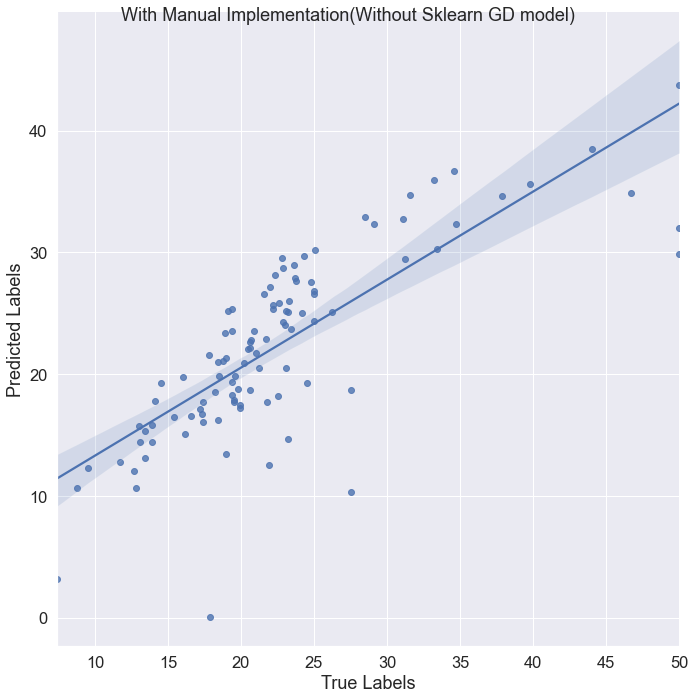

In [50]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, size = 10)

fig1 = lm1.fig 

fig1.suptitle("With Manual Implementation(Without Sklearn GD model)", fontsize=18)

sns.set(font_scale = 1.5)

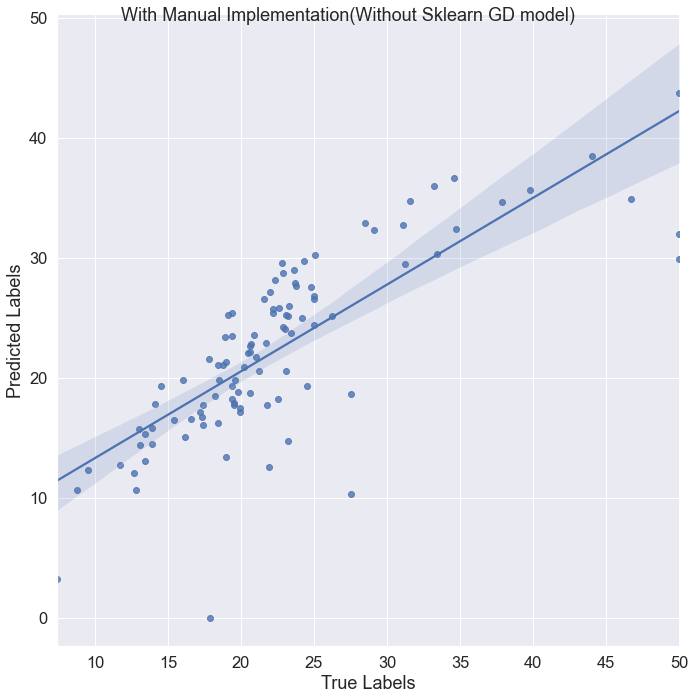

In [49]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, height = 10)

fig1 = lm1.fig 

fig1.suptitle("With Manual Implementation(Without Sklearn GD model)", fontsize=18)

sns.set(font_scale = 1.5)

In [43]:
X_temp = X_train.drop("PRICE", axis = 1, inplace = False)
X_std = StandardScaler().fit_transform(X_temp)
X = pd.DataFrame(X_std, columns = columnNames)
Y = Y_train

X_test_temp = X_test.drop("PRICE", axis = 1, inplace = False)
X_test_std = StandardScaler().fit_transform(X_test_temp)
X_te = pd.DataFrame(X_test_std, columns = columnNames)
Y_te = Y_test

clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling', max_iter = 2500)
clf.fit(X, Y)

Y_pred = clf.predict(X_te)

print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.89533898  1.06664128  0.14920204  0.43730232 -2.08909754  2.91771551
  0.00530878 -3.01068891  2.30509997 -2.08863393 -2.18640495  0.97598674
 -3.42241723]
Y Intercept = [22.51347788]


In [44]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2

,True Labels,Predicted Labels
176,23.2,26.232078
165,25.0,26.049705
127,16.2,14.915924
136,17.4,15.785767
180,39.8,36.469630
...,...,...
2,34.7,32.058886
378,13.1,15.259141
151,19.6,18.353366
31,14.5,18.206133


In [48]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

24.159264393589776

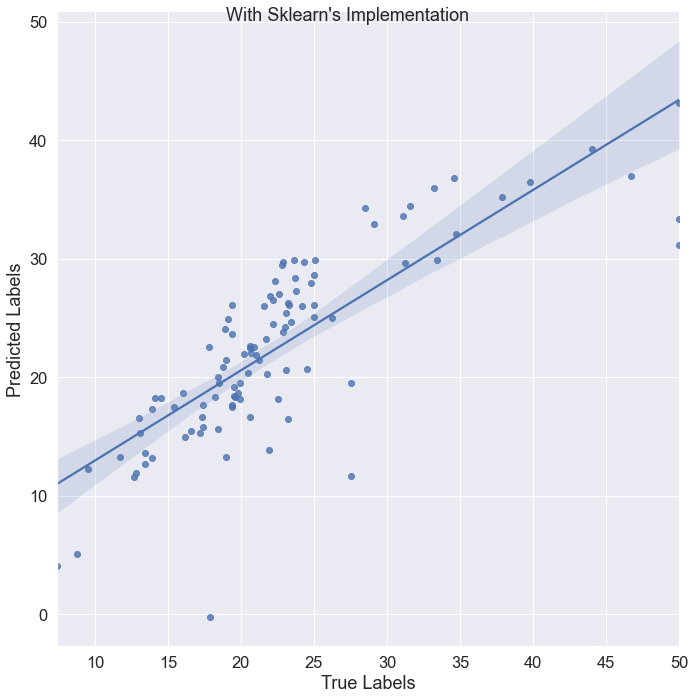

In [47]:
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, height = 10)

fig2 = lm2.fig 

# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)

sns.set(font_scale = 1.5)